In [78]:
import numpy as np
from matplotlib import pyplot as plt, patches

plt.rcParams.update({"font.size": 24, 'figure.facecolor': 'none', 'axes.facecolor': 'white', 'xtick.minor.visible': True, 'ytick.minor.visible': True})

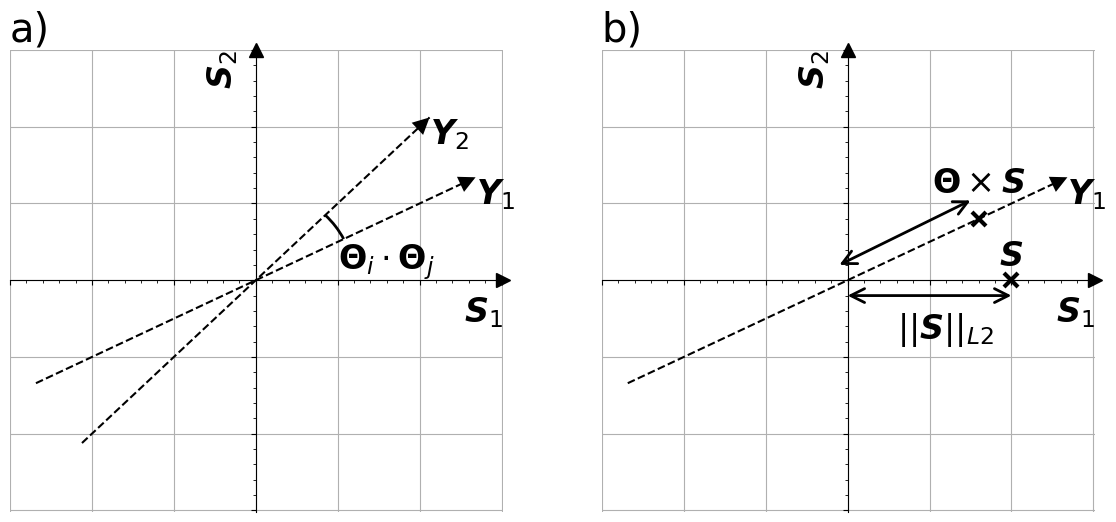

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

A = np.array([[2, 1], [1, 1]], dtype=float) # measurement matrix
A = A /np.linalg.norm(A, axis= 1)[:,None] # normalise

y = np.array([1, 0], dtype=float) # sparse vector
y_transform = (A @ y)[:, None] *A # transformed vector projected along A. (A @ y) can be treated as a scalar parametric value like t.

t = np.array([-1.5, 1.5]) # parametric variable

arrow1 = patches.FancyArrowPatch((A[0,0] *t[0], A[0,1] *t[0]), (A[0,0] *t[-1], A[0,1] *t[-1]),
                                 arrowstyle="-|>", linestyle="-", color="k", lw=0, mutation_scale=30, shrinkB= 0.0, zorder=10)
arrow2 = patches.FancyArrowPatch((A[0,0] *t[0], A[0,1] *t[0]), (A[0,0] *t[-1], A[0,1] *t[-1]), # arrow1 cannot be reused for a different axis.
                                 arrowstyle="-|>", linestyle="-", color="k", lw=0, mutation_scale=30, shrinkB= 0.0, zorder=10)
arrow3 = patches.FancyArrowPatch((A[1,0] *t[0], A[1,1] *t[0]), (A[1,0] *t[-1], A[1,1] *t[-1]),
                                 arrowstyle="-|>", linestyle="-", color="k", lw=0, mutation_scale=30, shrinkB= 0.0, zorder=10)

axs[0].plot(A[0,0] *t, A[0,1] *t, color= "k", linestyle= "--")
axs[0].plot(A[1,0] *t, A[1,1] *t, color= "k", linestyle= "--")
axs[0].add_patch(arrow2); axs[0].add_patch(arrow3)
axs[0].spines['left'].set_position('zero'); axs[0].spines['right'].set_color('none'); axs[0].spines['bottom'].set_position('zero'); axs[0].spines['top'].set_color('none')
axs[0].plot(1, 0, ">", transform=axs[0].get_yaxis_transform(), clip_on=False, color='black', markersize= 10); axs[0].plot(0, 1, "^", transform=axs[0].get_xaxis_transform(), clip_on=False, color='black', markersize= 10)
axs[0].set(xlim=(-1.5, 1.51), ylim=(-1.51, 1.5), xticklabels= [], yticklabels= [], xticks= [-1.5, -1, -0.5, 0, 0.5, 1, 1.5], yticks= [-1.5, -1, -0.5, 0, 0.5, 1, 1.5])
axs[0].text(A[0,0] *t[-1], A[0,1] *t[-1], r"$\boldsymbol{Y}_1$", ha= "left", va= "top")
axs[0].text(A[1,0] *t[-1], A[1,1] *t[-1], r"$\boldsymbol{Y}_2$", ha= "left", va= "top")
axs[0].set_xlabel(r"$\boldsymbol{S}_1$", loc= "right")
axs[0].set_ylabel(r"$\boldsymbol{S}_2$", loc= "top")
axs[0].set_title("a)", loc= "left")
axs[0].grid()

arc = patches.Arc((0, 0), 1.2, 1.2, theta1= np.degrees(np.arctan(A[0,1]/A[0,0])), theta2= np.degrees(np.arctan(A[1,1]/A[1,0])),
                  color= "k", linewidth= 2, zorder=10)
axs[0].add_patch(arc)
axs[0].text(0.8, 0.12, r"$\boldsymbol{\Theta}_i \cdot \boldsymbol{\Theta}_j$", ha="center", va="center", color= "k")


axs[1].plot(A[0,0] *t, A[0,1] *t, color= "k", linestyle= "--") # y1 axis
axs[1].add_patch(arrow1)
axs[1].text(A[0,0] *t[-1], A[0,1] *t[-1], r"$\boldsymbol{Y}_1$", ha= "left", va= "top")

axs[1].plot(y[0], y[1], color= "k", marker= "x", linestyle= "None", markersize= 10, markeredgewidth= 3, markerfacecolor= "none", markeredgecolor= "k") # S before transformation
axs[1].text(y[0], y[1] +0.05, r"$\boldsymbol{S}$", ha= "center", va= "bottom")
axs[1].annotate("", xy= (0,0 -0.1), xytext= (y[0], y[1] -0.1), arrowprops= {"arrowstyle": "<->", "shrinkA": 0, "shrinkB": 0, "linewidth": 2, "mutation_scale": 25})
axs[1].text(0.6, -0.2, r"$||\boldsymbol{S}||_{L2}$", ha= "center", va= "top")

axs[1].plot(y_transform[0,0], y_transform[0,1], marker= "x", linestyle= "None", markersize= 10, markeredgewidth= 3, markerfacecolor= "none", markeredgecolor= "k") # S after transformation
axs[1].text(y_transform[0,0], y_transform[0,1] +0.12, r"$\boldsymbol{\Theta} \times \boldsymbol{S}$", ha= "center", va= "bottom")
axs[1].annotate("", xy= (0 -0.05,0 +0.1), xytext= (y_transform[0,0] -0.05, y_transform[0,1] +0.12), arrowprops= {"arrowstyle": "<->", "shrinkA": 0, "shrinkB": 0, "linewidth": 2, "mutation_scale": 25})
#axs[1].text(0.4, 0.35, r"$||\boldsymbol{\Theta} \times \boldsymbol{S}||_{L2}$", ha= "right", va= "bottom")

axs[1].spines['left'].set_position('zero'); axs[1].spines['right'].set_color('none'); axs[1].spines['bottom'].set_position('zero'); axs[1].spines['top'].set_color('none')
axs[1].plot(1, 0, ">", transform=axs[1].get_yaxis_transform(), clip_on=False, color='black', markersize= 10); axs[1].plot(0, 1, "^", transform=axs[1].get_xaxis_transform(), clip_on=False, color='black', markersize= 10)
axs[1].set(xlim=(-1.5, 1.51), ylim=(-1.51, 1.5), xticklabels= [], yticklabels= [], xticks= [-1.5, -1, -0.5, 0, 0.5, 1, 1.5], yticks= [-1.5, -1, -0.5, 0, 0.5, 1, 1.5])
axs[1].set_xlabel(r"$\boldsymbol{S}_1$", loc= "right")
axs[1].set_ylabel(r"$\boldsymbol{S}_2$", loc= "top")
axs[1].set_title("b)", loc= "left")
axs[1].grid()

plt.show()

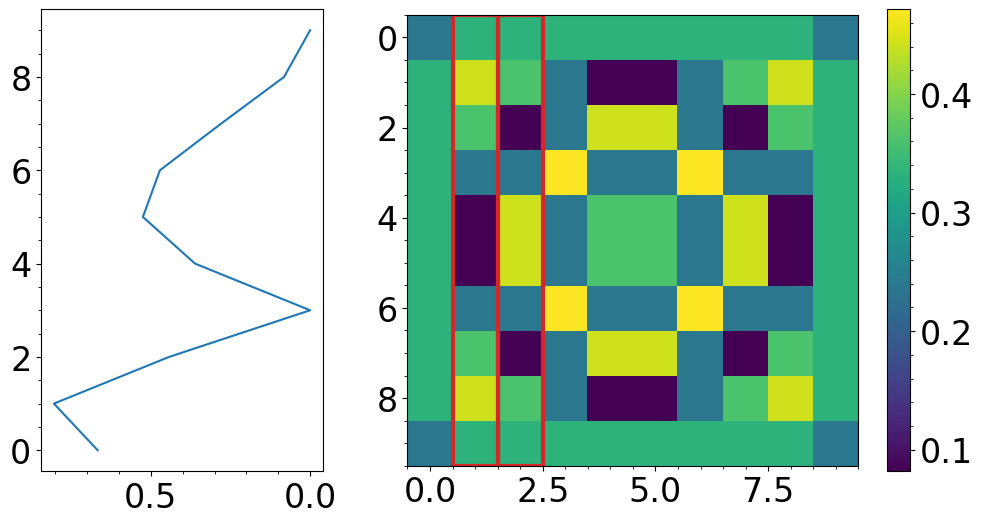

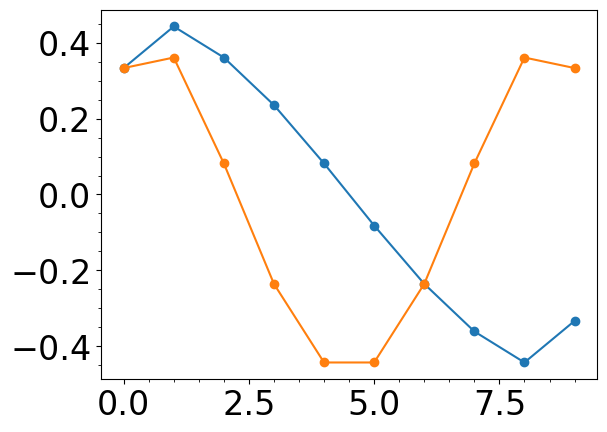

In [197]:
from scipy import fft as spfft
import CS_functions as cs

N = 10
freqs = np.array([1, 2])

dct_matrix = spfft.dct(np.identity(N), axis= 0, norm= "ortho", type= 1)

fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={"width_ratios": [1, 2]})

axs[0].plot(np.abs(np.sum(dct_matrix[:,freqs], axis= 1)), np.arange(N),  color='tab:blue')
axs[0].xaxis.set_inverted(True)

boxs = [patches.Rectangle((freq -0.5, -0.5), 1, N, linewidth=3, edgecolor='tab:red', facecolor='none', transform= axs[1].transData) for freq in freqs]

im = axs[1].imshow(np.abs(dct_matrix), cmap="viridis")
[axs[1].add_patch(box) for box in boxs]

fig.colorbar(im, ax=axs[1])
plt.show()


fig, axs = plt.subplots()

axs.plot(np.arange(N), dct_matrix[:,freqs], marker= "o")

plt.show()

[[ 0.33333333  0.33333333]
 [-0.33333333  0.33333333]]
RIP delta: 0.529
RIP delta: 0.529
Angular similarity: 77.160 degrees
Mutual coherence: 0.703


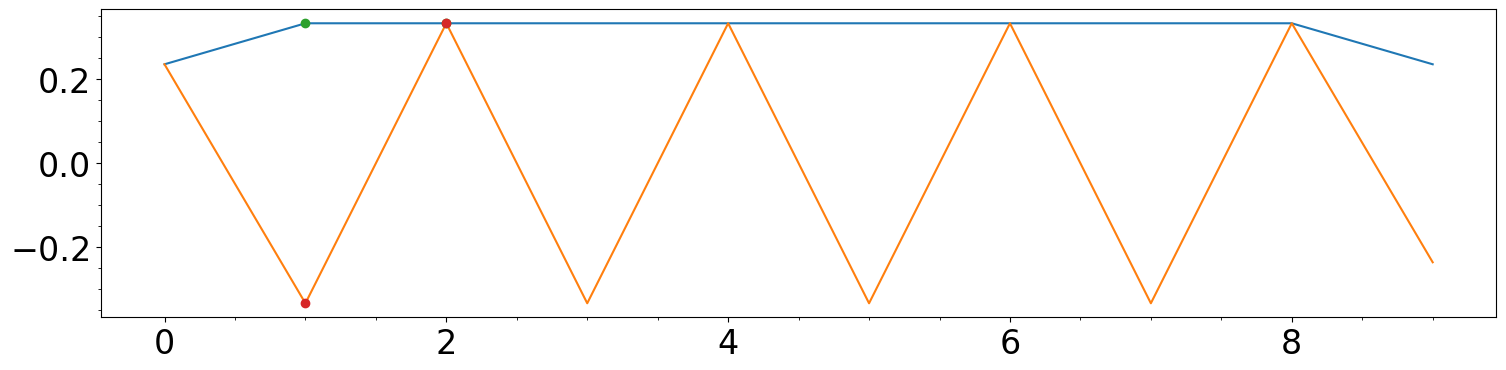

In [198]:
samples_idx = np.array([0,9])

spectrum = np.zeros(N)
spectrum[freqs] = 1.0

interferogram = spfft.idct(spectrum, norm= "forward", type= 1)
samples = np.full(N, np.nan)
samples[samples_idx] = interferogram[samples_idx]


locations = np.nonzero(~np.isnan(samples))
cropping_matrix = np.identity(N, dtype= np.float16)
cropping_matrix = cropping_matrix[locations] #cropping matrix operator. THIS WILL CHANGE THE L2 NORM.
dct_matrix = spfft.idct(np.identity(N), axis= 0, norm= "ortho", type= 1) # ORTHO MUST BE USED FOR RIP. The l2 norm must remain unchanged by the transformation.
measurement_matrix = np.matmul(cropping_matrix, dct_matrix)
dense_basis = measurement_matrix[:, freqs]

plt.figure(figsize=(18, 4))
plt.plot(measurement_matrix.T)
plt.plot(freqs, measurement_matrix[:,freqs].T, 'o')

print(dense_basis) # This is the important part of the measurement matrix. It shows the sampled points and their corresponding frequency components.
RIP_delta = np.linalg.norm(measurement_matrix @ spectrum) / np.linalg.norm(spectrum)
RIP_delta = np.abs(1 -RIP_delta)
print(f"RIP delta: {RIP_delta:.3f}")

RIP_delta = np.linalg.norm(dense_basis @ spectrum[freqs]) / np.linalg.norm(spectrum[freqs])
RIP_delta = np.abs(1 -RIP_delta)
print(f"RIP delta: {RIP_delta:.3f}")

mutual_coherence = np.max([np.abs(np.dot(measurement_matrix[:,i], measurement_matrix[:,j])) for j in range(N) for i in range(j)])
angular_similarity = np.rad2deg(np.arccos(mutual_coherence))
print(f"Angular similarity: {angular_similarity:.3f} degrees")
mutual_coherence *= np.sqrt(N)
print(f"Mutual coherence: {mutual_coherence:.3f}")

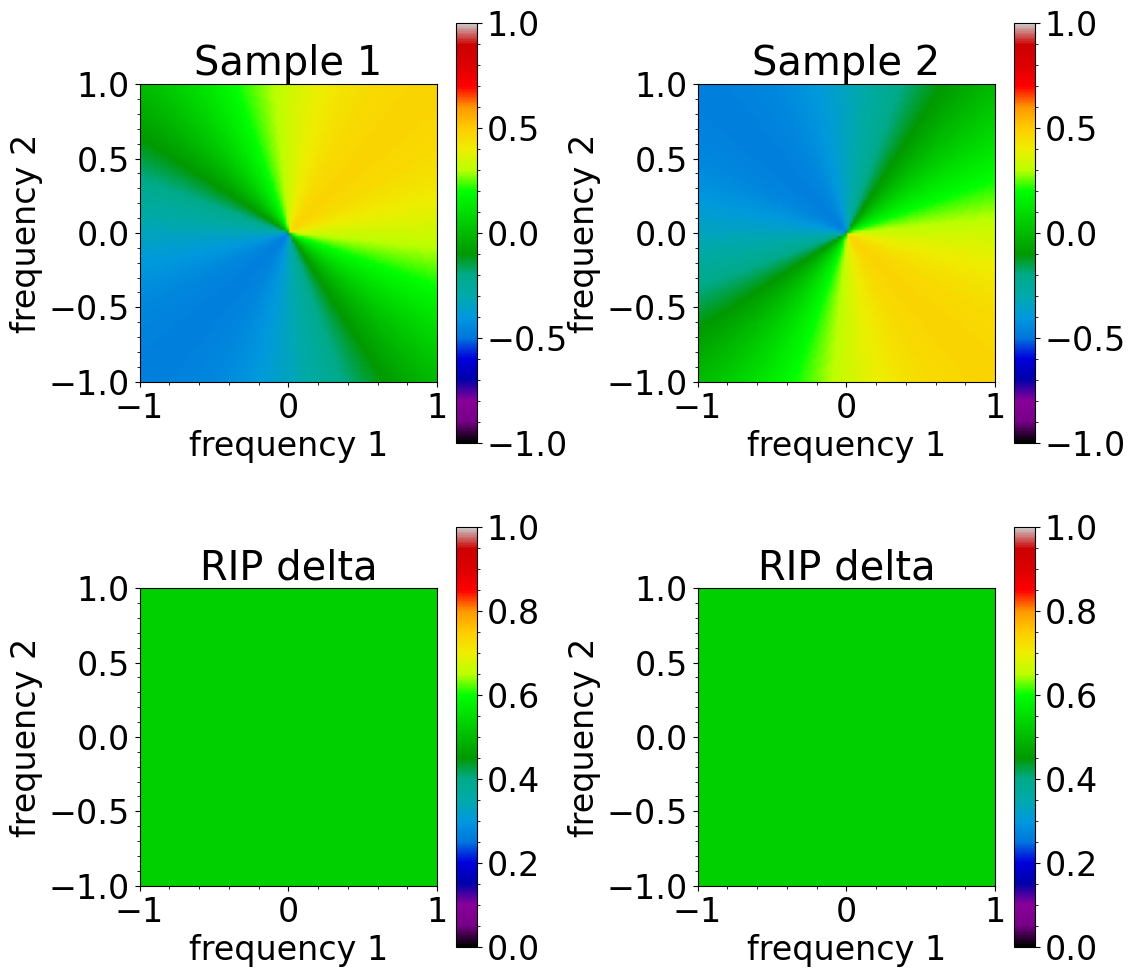

Sample 1, max = 0.471, min = -0.471
Sample 2, max = 0.471, min = -0.471


In [215]:
freqs = np.array([1, 2]) 

M = 100

deltas = np.empty((M, M))
possible_measurements = np.empty((len(samples_idx), M, M))

for n in range(M):
    for m in range(M):
        spectrum = np.zeros(N)
        spectrum[freqs[0]] = 2*n / (M-1) - 1
        spectrum[freqs[1]] = 2*m / (M-1) - 1 

        possible_measurements[:, n, m] = measurement_matrix @ spectrum / np.linalg.norm(spectrum)
        RIP_delta = np.linalg.norm(measurement_matrix @ spectrum) / np.linalg.norm(spectrum)
        RIP_delta = np.abs(1 -RIP_delta)
        deltas[n, m] = RIP_delta

RIP_delta2 = np.sqrt(np.sum(possible_measurements**2, axis=0))
RIP_delta2 = np.abs(1 - RIP_delta2)

fig, axs = plt.subplots((len(samples_idx)+1)//2 +1, 2, figsize=(12, 6*((len(samples_idx)+1)//2 +1)), gridspec_kw={"wspace": 0.5, "hspace": 0.2})
axs = axs.flatten()

for i in range(len(samples_idx)):
    im = axs[i].imshow(possible_measurements[i], origin="lower", vmin=-1, vmax=1, cmap="nipy_spectral", extent=(-1, 1, -1, 1), aspect='equal')
    axs[i].set(xlabel="frequency 1", ylabel="frequency 2", title=f"Sample {i+1}")
    fig.colorbar(im, ax=axs[i])

im = axs[-1].imshow(deltas, origin= "lower", vmin= 0, vmax= 1, cmap= "nipy_spectral", extent=(-1, 1, -1, 1), aspect='equal')
axs[-1].set(xlabel= "frequency 1", ylabel= "frequency 2", title= "RIP delta")
fig.colorbar(im, ax=axs[-1])

im = axs[-2].imshow(RIP_delta2, origin= "lower", vmin= 0, vmax= 1, cmap= "nipy_spectral", extent=(-1, 1, -1, 1), aspect='equal')
axs[-2].set(xlabel= "frequency 1", ylabel= "frequency 2", title= "RIP delta")
fig.colorbar(im, ax=axs[-2])

plt.show()

for i in range(len(samples_idx)):
    print(f"Sample {i+1}, max = {np.max(possible_measurements[i]):.3f}, min = {np.min(possible_measurements[i]):.3f}")

In [180]:
cs.RIP(measurement_matrix, len(freqs))

Matrix dimensions (m, n): (7, 10)
Sparsity level (s): 2
Number of submatrices to check (C(n, s)): 45


--- Computation Complete ---
Overall maximum eigenvalue found: 1.0000
Overall minimum eigenvalue found: 0.2876


np.float64(0.7123860142010858)

In [181]:
print(np.sqrt(2) -1)
cs.RIP(dense_basis, len(freqs))

0.41421356237309515
Matrix dimensions (m, n): (7, 2)
Sparsity level (s): 2
Number of submatrices to check (C(n, s)): 1


--- Computation Complete ---
Overall maximum eigenvalue found: 0.7983
Overall minimum eigenvalue found: 0.7245


np.float64(0.27545060744435634)

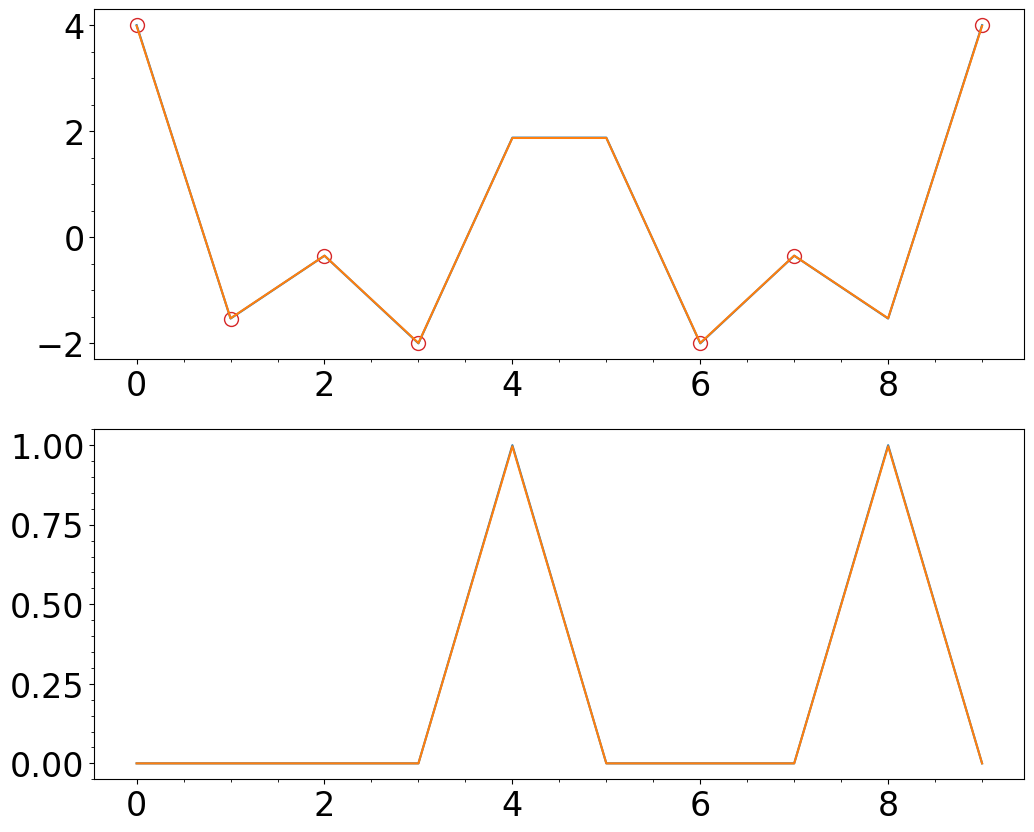

In [182]:
reconstruction = cs.compressed_sensing(samples, alpha= 1e-2, norm= "forward")
reconstruction_DCT = spfft.dct(reconstruction, norm= "forward", type= 1)

fig, axs = plt.subplots(2, 1, figsize=(12, 10))

axs[0].plot(np.arange(N), interferogram, label="Interferogram", color='tab:blue')
axs[0].plot(samples_idx, samples[samples_idx], 'o', label="Samples", markeredgecolor='tab:red', markerfacecolor='none', markersize=10)
axs[0].plot(np.arange(N), reconstruction, label="Reconstruction", color='tab:orange')

axs[1].plot(np.arange(N), spectrum, label="Spectrum", color='tab:blue')
axs[1].plot(np.arange(N), reconstruction_DCT, label="Reconstruction DCT", color='tab:orange')

plt.show()